### KNN 회귀 (Regression)

### 생선의 길이를 사용하여 무게를 예측

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이와 무게를 산포도로 표현

In [3]:
import matplotlib.pyplot as plt

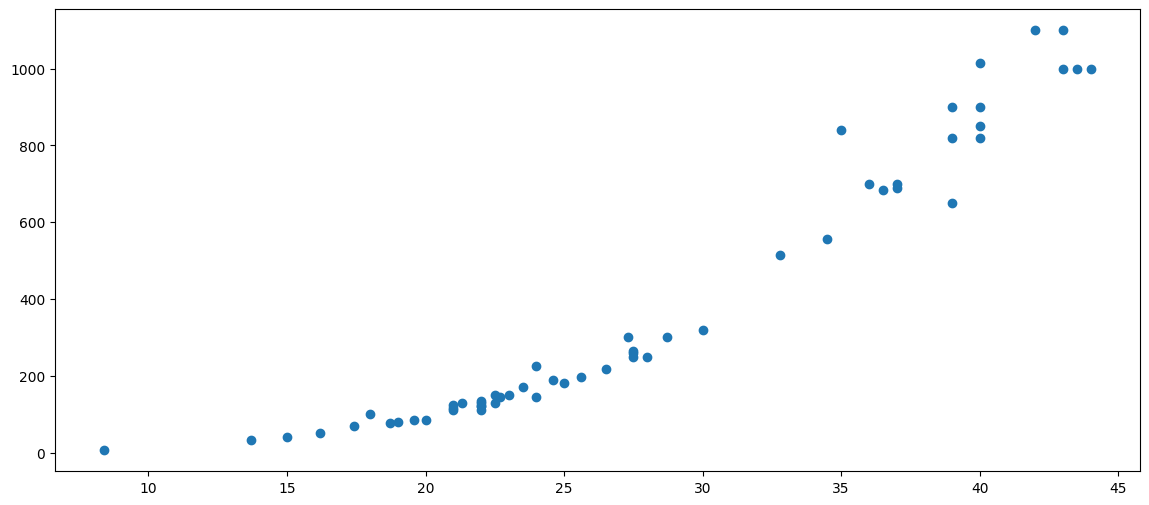

In [4]:
plt.figure(figsize=(14,6))
plt.scatter(fish_length,fish_weight,)
plt.show()

#### Train과 Test 분리

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = \
    train_test_split(fish_length,fish_weight,random_state=42)

In [7]:
print(train_input.shape, test_input.shape)
# column이 없으면 scikit-learn은 처리하지 못하므로 열을 만들어줘야 한다. <- reshape 사용

(42,) (14,)


In [8]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [9]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [10]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [11]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


> 열 생성 완료

### 회귀모델 사용

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [14]:
knr.score(test_input, test_target)

0.992809406101064

평균 절대값 오차: 결정계수 (R^2)       
R^2 = 1 - (((타깃 - 예측)^2 의 합) / ((타깃 - 평균)^2 의 합))       


In [15]:
from sklearn.metrics import mean_absolute_error

In [16]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target,test_prediction)
mae

19.157142857142862

> 오차 = 약 19

### 과대적합과 과소적합

In [17]:
# train
knr.score(train_input, train_target)

0.9698823289099254

In [18]:
knr.score(test_input, test_target)

0.992809406101064

> train보다 test의 점수가 잘 나왔으므로 과소적합이 발생했다.    
> 보통은 train점수가 test점수보다 조금 더 잘 나온 과대적합을 기준으로 삼는다.   

### knn의 Hyper parameter를 조절해야 함
default: 5 -> 3

In [19]:
knr.n_neighbors = 3
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [20]:
print('Train Score:',knr.score(train_input,train_target))
print('Test Score:',knr.score(test_input,test_target))

Train Score: 0.9804899950518966
Test Score: 0.9746459963987609


> 과소적합 문제 해결    
> 이웃의 개수를 줄이면 과대적합으로 되고, 이웃의 개수를 늘리면 과소적합이 된다.

### 이웃의 개수 조절로 확인

In [21]:
import numpy as np

K ==> 1
Train Score: 0.9852830341215901
Test Score: 0.991309195814175
--------------------
과소적합


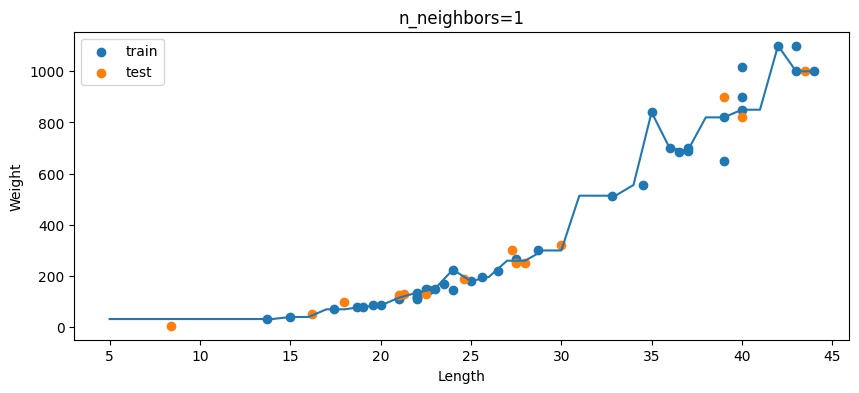

K ==> 3
Train Score: 0.9804899950518966
Test Score: 0.9746459963987609
--------------------
과대적합


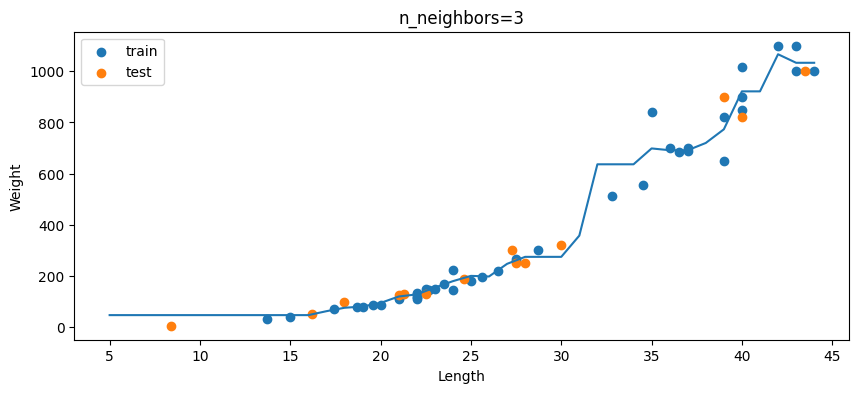

K ==> 5
Train Score: 0.9698823289099254
Test Score: 0.992809406101064
--------------------
과소적합


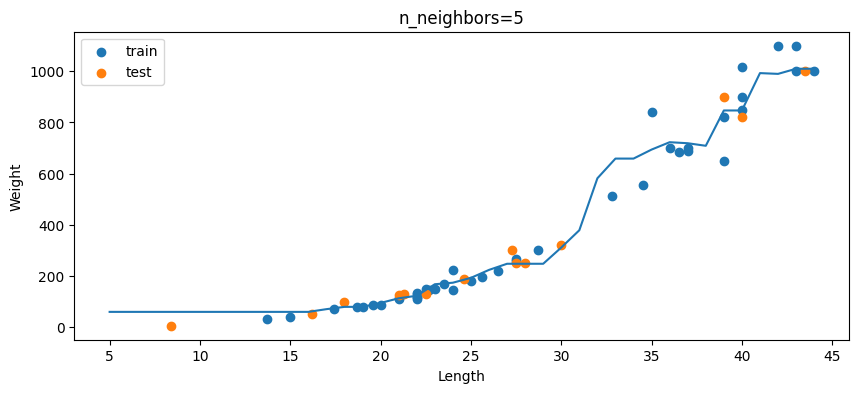

K ==> 10
Train Score: 0.96164569026043
Test Score: 0.9737908255822255
--------------------
과소적합


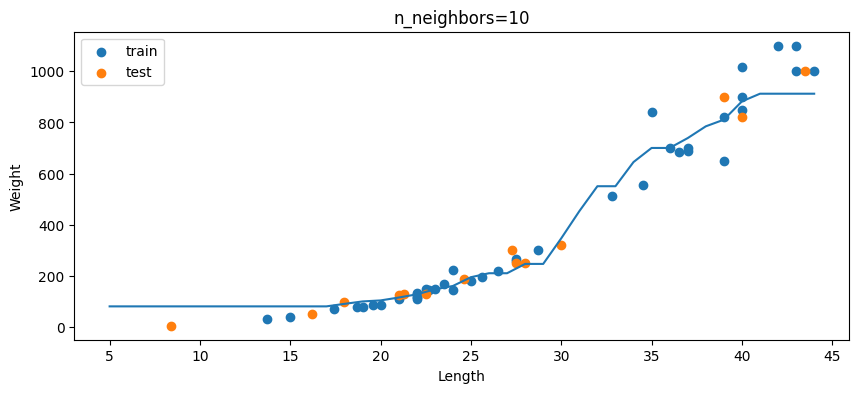

In [22]:
knr = KNeighborsRegressor()

# x좌표 (생선의 length 5~44)
x = np.arange(5,45).reshape(-1,1)

for n in [1,3,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input,train_target)
    print("K ==>",n)
    print("Train Score:",knr.score(train_input,train_target))
    print("Test Score:",knr.score(test_input,test_target))
    print("-"*20)
    if knr.score(train_input,train_target) > knr.score(test_input,test_target):
        print('과대적합')
    else:
        print('과소적합')

    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)

    # 훈련세트와 검증세트의 예측 결과 그래프 그리기
    plt.figure(figsize=(10,4))
    plt.scatter(train_input,train_target,label='train')
    plt.scatter(test_input,test_target,label='test')
    plt.plot(x,prediction)
    plt.title('n_neighbors=%d'%n)
    plt.xlabel('Length')
    plt.ylabel('Weight')
    plt.legend()
    plt.show()

In [23]:
len(train_input)

42

In [24]:
len(test_input)

14